---
CSC 268 Lab 6:  Local Filtering
---

This lab will explore the use of various local filtering methods.  Portions are based upon Tony Flores work at [Medium](https://medium.com/@florestony5454/median-filtering-with-python-and-opencv-2bce390be0d1), including the brain scan image.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='gray')

def imshow(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

We begin with order-based filtering, specifically the min, max, and median filters.  For an image we will use a brain scan that has been corrupted with _salt-and-pepper_ noise: a small number of pixels have been replaced with random values that are either much higher or much lower than their neighbors. 

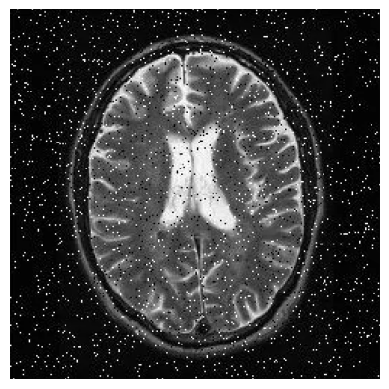

In [2]:
brain = cv.imread('brain.png',0).astype(np.float32)/255.0
imshow(brain)

We are about to see the effect of the different order-based filters.  We could do this using the built-in functions `erode`, `dilate`, and `medianBlur` from OpenCV.  However, in order to clarify what is happening we will for the time being rely on our own implementation that makes the local processing explicit.  Our `local_filter` function takes an image, a neighborhood, and a function.  It loops over all valid neighborhoods in the image and applies the function to produce a result.  With this general approach we can easily try out all three order-based filters.

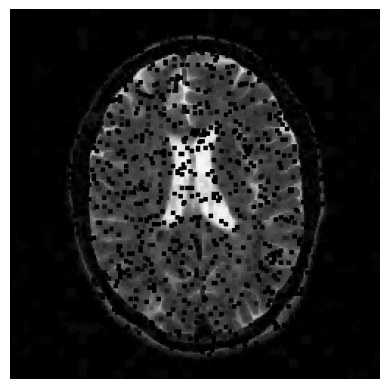

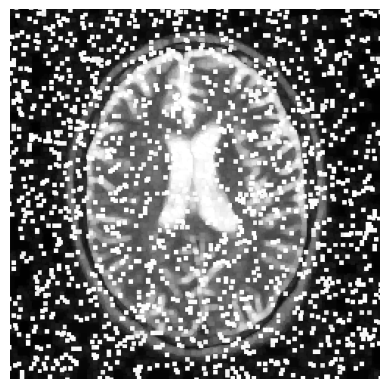

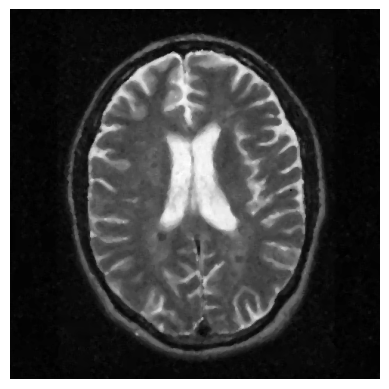

In [3]:
def local_filter(img,fdim,fun):
    [n_row,n_col] = img.shape
    out = np.zeros((n_row-fdim[0],n_col-fdim[1]),np.float32)
    for i in range(n_row-fdim[0]):
        for j in range(n_col-fdim[1]):
            out[i,j] = fun(img[i:i+fdim[0],j:j+fdim[1]])
    return out
                   
imshow(local_filter(brain,[5,5],np.min))
imshow(local_filter(brain,[5,5],np.max))
imshow(local_filter(brain,[5,5],np.median))

What do you notice about the results?  What is the effect of each of the filters?  Which could help you to detect salt-and-pepper noise?  Which helps to eliminate it?

The one disadvantage of our function is that it takes a rather long time to run.  Compare it to using the OpenCV functions mentioned above.  Verify that they give similar results, and note how much faster they run.

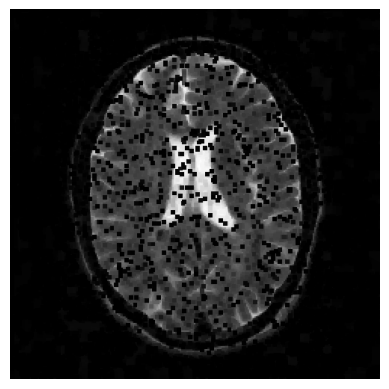

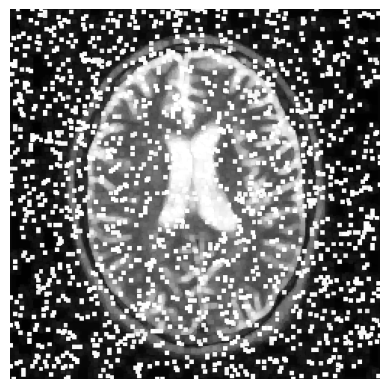

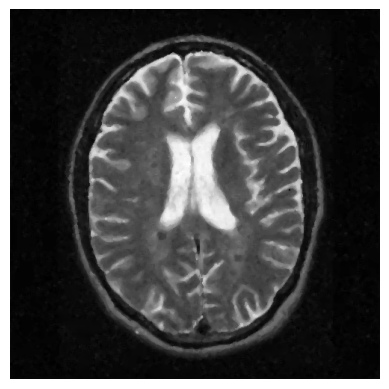

In [4]:
size = (5, 5)
shape = cv.MORPH_RECT
kernel = cv.getStructuringElement(shape, size)

# TODO:  apply OpenCV functions to achieve min, max, and median filtering
imshow(cv.erode(brain,kernel))
imshow(cv.dilate(brain,kernel))
imshow(cv.medianBlur(brain,5))

### Part Two:  Linear Filters

Now let's try a linear filter.  We can use the same local filter function as before, if we define a local function that computes a weighted average of the inputs.

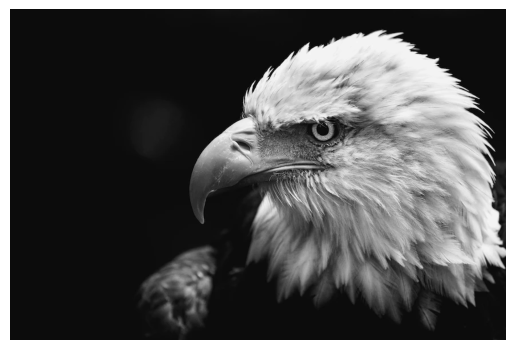

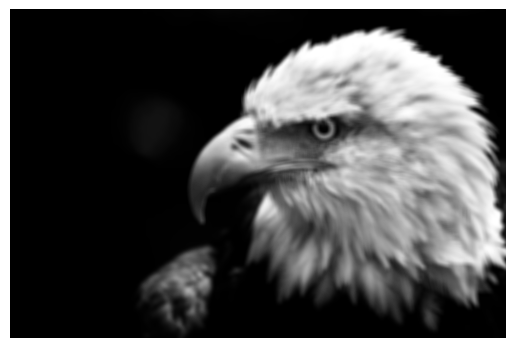

In [5]:
eagle = cv.imread('eagle.png',0).astype(np.float32)/255.0
imshow(eagle)

def simple_average(v):
    return v.ravel().mean()

imshow(local_filter(eagle,[9,9],simple_average))

The `simple_average` function applies equal weights to every element in the neighborhood, resulting in an image blur via a simple box filter.  This can create boxy artifacts in the result.  A better approach is to use weights with crcular symmetry, like a Gaussian filter.  We can create a generator that takes a kernel filter and produces a suitable function.

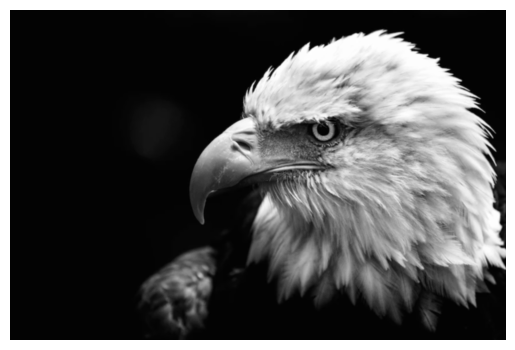

In [6]:
def weighted_average(w):
    def inner_fun(v):
        return (w.ravel()*v.ravel()).sum()
    return inner_fun

imshow(local_filter(eagle,[3,3],weighted_average(np.array([[1,2,1],[2,4,2],[1,2,1]])/16)))

Try it yourself with a different kernel, perhaps a larger Gaussian.

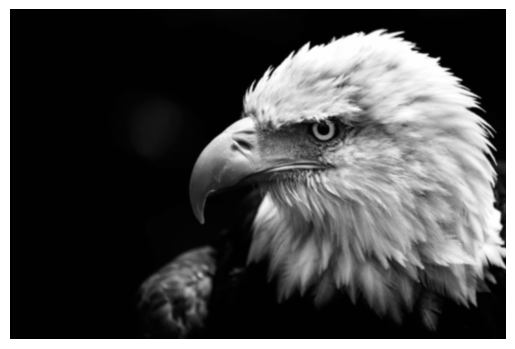

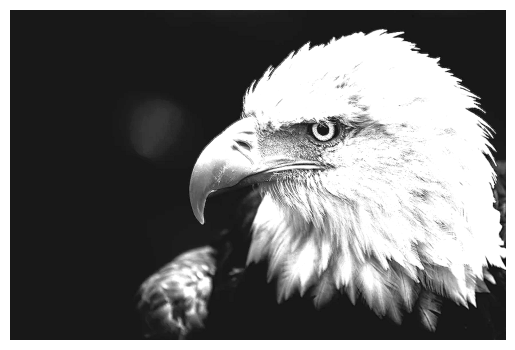

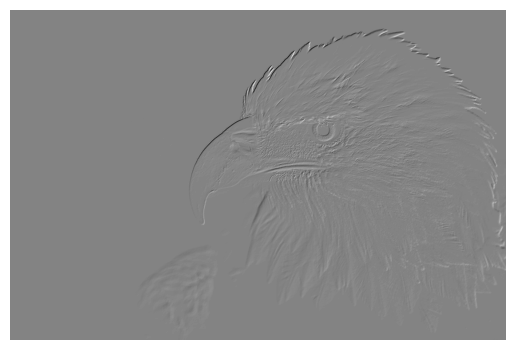

In [13]:
# TODO:  Perform local filtering with different kernel weights.
imshow(local_filter(eagle,[5,5],weighted_average(np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])/256)))
imshow(local_filter(eagle,[3,3],weighted_average(np.array([[0,-1,0],[-1,4,-1],[0,-1,1]]))).clip(min=0,max=1))
imshow(local_filter(eagle,[3,3],weighted_average(np.array([[0,1,0],[1,0,-1],[0,-1,0]]))))

Of course, our implementation is again rather slow.  We can use OpenCV's `filter2D` function to achieve the same thing a bit faster.

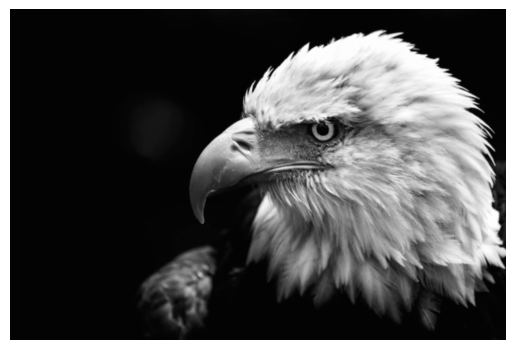

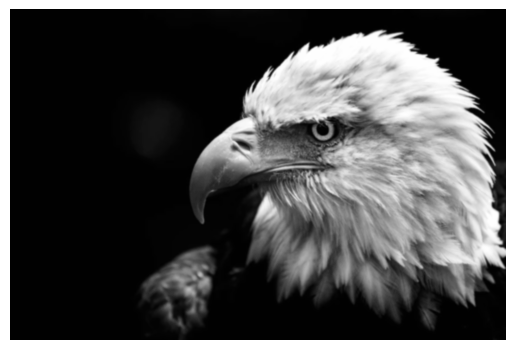

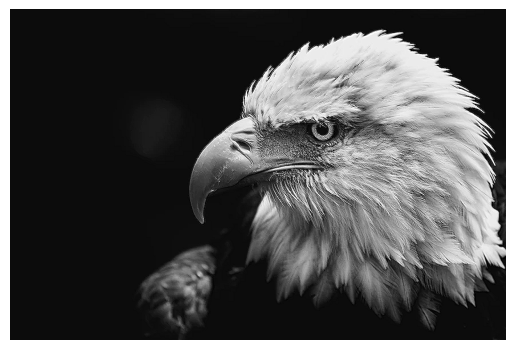

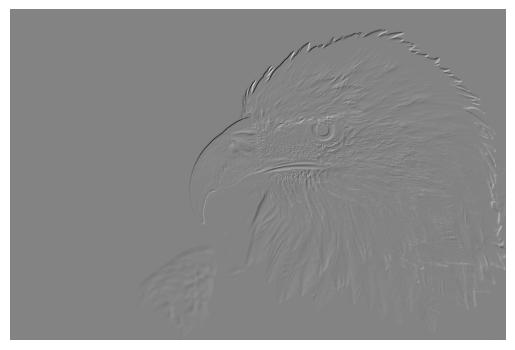

In [15]:
imshow(cv.filter2D(src=eagle, ddepth=-1, kernel=np.array([[1,2,1],[2,4,2],[1,2,1]])/16)) # ddepth=-1 means same output format as input

# TODO: Implement your other filtering experiments using filter2D
imshow(cv.filter2D(src=eagle, ddepth=-1, kernel=np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])/256))
imshow(cv.filter2D(src=eagle, ddepth=-1, kernel=np.array([[0,-1,0],[-1,4,-1],[0,-1,1]])).clip(min=0,max=1))
imshow(cv.filter2D(src=eagle, ddepth=-1, kernel=np.array([[0,1,0],[1,0,-1],[0,-1,0]])))

If you have time at the end of the lab, experiment with other kernels.  You can try ones we discussed in class, or make up your own.  Some possible goals:
* Can you come up with a filter that makes a "double exposure" image, where the same picture overlaps itself with a spatial offset?
* Can you come up with a picture that simulates motion blur, as though the picture was taken from a camera on a speeding car?

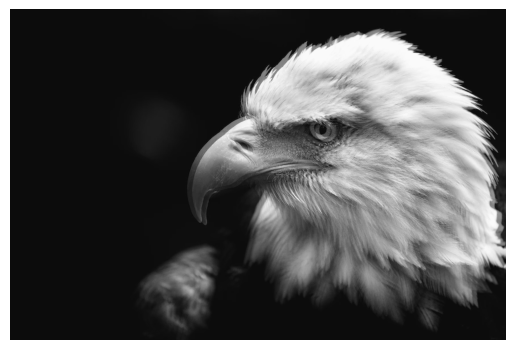

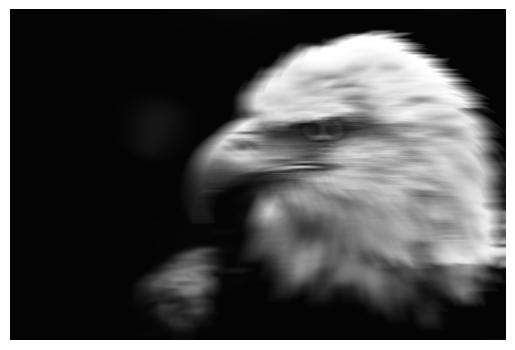

In [18]:
imshow(cv.filter2D(src=eagle, ddepth=-1, kernel=np.array([[1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,1]])/2))
imshow(cv.filter2D(src=eagle, ddepth=-1, kernel=np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])/40))